In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D
from scipy import ndimage
from photutils import aperture
import numpy as np

In [3]:
continuum = fits.open('fits/member.uid___A001_X158f_Xb8.AT_Pyx_sci.spw19_21_23_25.cont.I.pbcor.fits')[0].data[0][0]

continuum = Cutout2D(continuum,(len(continuum[1])/2,len(continuum[0])/2),(60,60))

continuum.shape

(60, 60)

[6.46192692e-05]


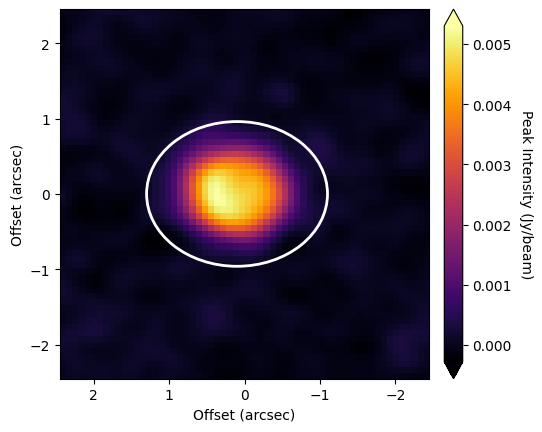

In [24]:
fig, ax = plt.subplots()

positions = [(0.1, 0)]
m=1.2
ap = aperture.EllipticalAperture(positions, a=1*m,b=0.8*m)



ap_patches = ap.plot(color='white', lw=2,
                           label='Photometry aperture')

Flux = aperture.ApertureStats(continuum.data, ap).sum


    

im = ax.imshow(continuum.data,
          cmap='inferno',
          extent=[0.08172*30,-0.08172*30,-0.08172*30,0.08172*30],origin='lower',zorder=-9)
cb = plt.colorbar(im, pad=0.03, extend='both', format='%.3f')
cb.set_label(r'Peak Intensity (Jy/beam)',
                     rotation=270, labelpad=15)

ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')
#plt.savefig('ContinuumFlux1.png')
print(Flux)


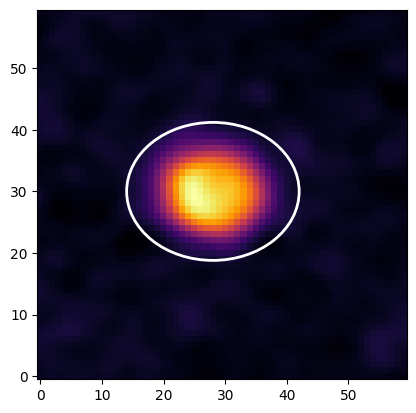

In [13]:
positions = [(28, 30)]
m=14
ap = aperture.EllipticalAperture(positions, a=1*m,b=0.8*m)



ap_patches = ap.plot(color='white', lw=2,
                           label='Photometry aperture')


plt.imshow(continuum.data,origin='lower',cmap='inferno')

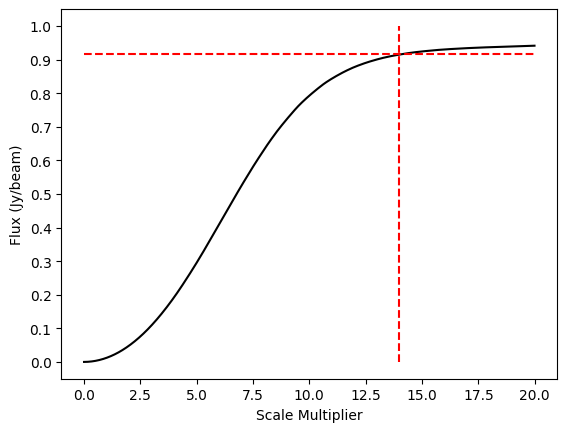

In [23]:

plt.locator_params(axis='y',nbins=20)
positions = [(len(continuum.data[0])/2 -2, len(continuum.data)/2)]
fluxes = []
index = []
for i in range(1,2000):
    ap = aperture.EllipticalAperture(positions, a=1*(i/100),b=0.8*(i/100))
    Flux = aperture.ApertureStats(continuum.data, ap).sum
    index.append(i/100)
    fluxes.append(Flux#*(np.pi*1*(i/100)*0.8*(i/100)*0.08172**2)/0.857
                 )


plt.plot(index,fluxes,color='black')
plt.plot(14*np.ones(50),np.linspace(0,1),linestyle='dashed',color='red')
plt.plot(np.linspace(0,20,50),0.915*np.ones(50),linestyle='dashed',color='red')

plt.xlabel('Scale Multiplier')
plt.ylabel('Flux (Jy/beam)')

plt.savefig('ContinuumFlux1.pdf')

Text(0, 0.5, 'Offset (arcsec)')

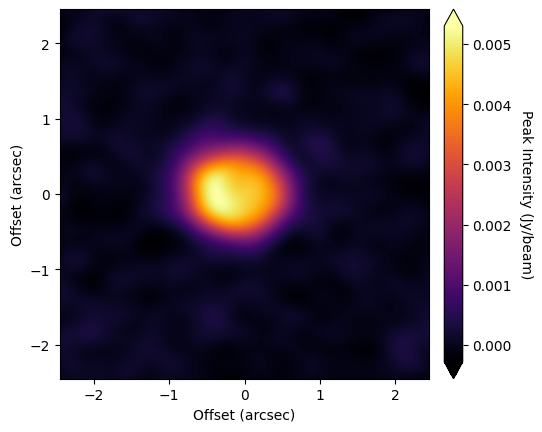

In [6]:
fig, ax = plt.subplots()
contbig = ndimage.zoom(continuum.data,10)
contgauss = ndimage.gaussian_filter(contbig,2)
conthipass = contbig - contgauss


im = ax.imshow(contgauss,
          cmap='inferno',
          extent=[-0.08172*30,0.08172*30,-0.08172*30,0.08172*30],origin='lower',zorder=-9)
cb = plt.colorbar(im, pad=0.03, extend='both', format='%.3f')
cb.set_label(r'Peak Intensity (Jy/beam)',
                     rotation=270, labelpad=15)

ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')
#plt.savefig('continuumblurred.png')

Text(0, 0.5, 'Offset (arcsec)')

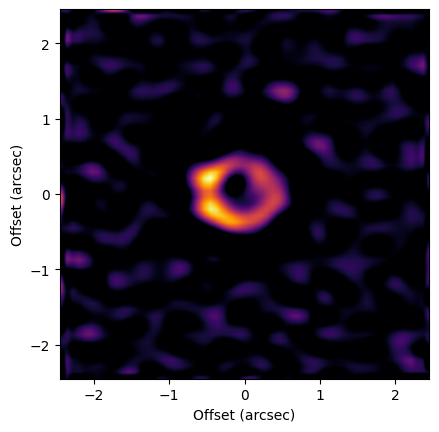

In [62]:
fig, ax = plt.subplots()

im = ax.imshow(conthipass,
          cmap='inferno',
          extent=[-0.08172*30,0.08172*30,-0.08172*30,0.08172*30],origin='lower',zorder=-9,vmin=0)
#cb = plt.colorbar(im, pad=0.03, extend='both', format='%.3f')
#cb.set_label(r'Peak Intensity (Jy/beam)',rotation=270, labelpad=15)

ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')

Text(0, 0.5, 'Offset (arcsec)')

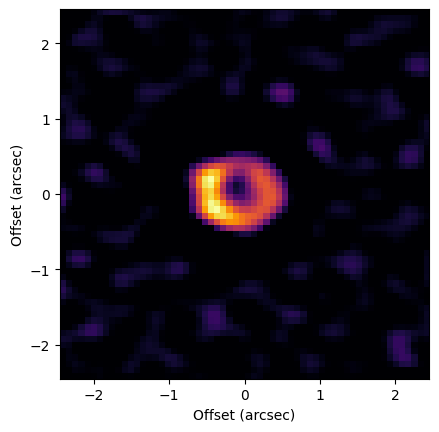

In [64]:
contgauss = ndimage.gaussian_filter(continuum.data,2)
conthipass = continuum.data - contgauss



fig, ax = plt.subplots()

im = ax.imshow(conthipass,
          cmap='inferno',
          extent=[-0.08172*30,0.08172*30,-0.08172*30,0.08172*30],origin='lower',zorder=-9,vmin=0)
#cb = plt.colorbar(im, pad=0.03, extend='both', format='%.3f')
#cb.set_label(r'Peak Intensity (Jy/beam)',rotation=270, labelpad=15)

ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')

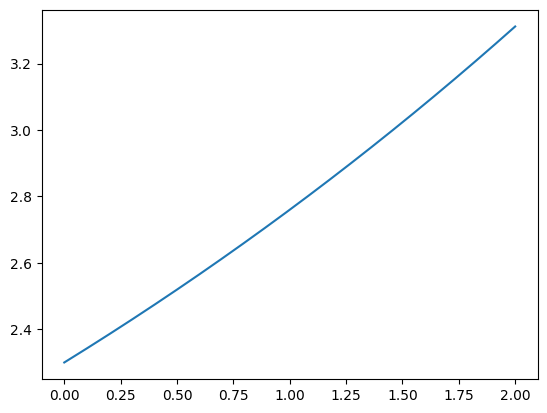

In [41]:
def opacity(beta):
    return 2.3*1.2**beta

beta = np.linspace(0,2,1000)
opa = opacity(beta)

plt.plot(beta,opa)

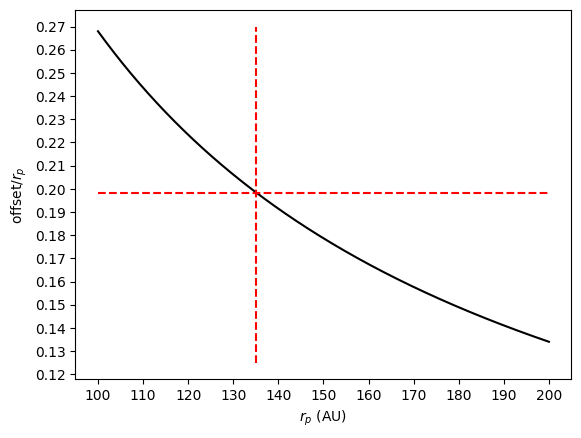

In [27]:
rp = np.linspace(100,200,1000)
offrp = 26.8/rp
plt.plot(rp,offrp,color='black')
plt.plot(135*np.ones(50),np.linspace(0.125,0.27),linestyle='dashed',color='red')
plt.plot(np.linspace(100,200,50),0.198*np.ones(50),linestyle='dashed',color='red')
plt.xlabel('$r_p$ (AU)')
plt.ylabel('offset/$r_p$')
plt.locator_params(axis='y',nbins=20)
plt.locator_params(axis='x',nbins=20)
plt.savefig('OffsetOverRp.png')

In [28]:
import math
def calculate_dust_mass_from_fnu(fnu,dfnu,d,dd,nu):
    
    #assuming standard law for opacity: 2.3 cm2/g * (nu/230 GHz)**0.4
    #assuming fixed dust temperatre of 20 K
    #M_dust = d**2 * F_nu / K_nu * B_nu(T(r)) with K_nu opacity, B_nu planck function
    # d input in parsec, fnu input in mJy, nu input in GHz
    
    #Step 1 calculate opacity:
        
    k_nu = 2.3 * (nu/230)**0.4 #cm2/g
    
    #Step 2 calculate planck function:
    T = 20
    h_planck =6.62607004e-34 #m2 kg / s 
    k_boltz = 1.38064852e-23 #m2 kg s-2 K-1
    c_light = 299792458 #m / s
    nu = nu * 1e9 # from Ghz to Hz
    
    B_nu = ((2 * h_planck * nu**3)/c_light**2) / (math.exp(nu*h_planck/(k_boltz * T))-1) #  W·sr−1·m−2·Hz−1
    #print B_nu
    
    #Step 3 calculate dust mass:
    # 1 Jy = 1e-26 W / (m2 Hz)
    # these are the units with intended input:
    # pc * (1e-29 W/(m2 Hz)) / (cm^2/g * W/(m2 * Hz)) = pc / (cm²/g) = pc * g/cm^2
    # so need to convert distance to cm and then result will be in grams    
    
    d = d * 3.08567758e18
    
    M_dust = (d**2) * fnu*1e-29 / (k_nu * B_nu) # in grams 
    M_dust = M_dust * 1.67442764e-28 # in earth masses
    
    d_Mdust = math.sqrt(((2 * fnu*1e-29 / (k_nu * B_nu)) * (d * dd))**2 + ((d**2) * dfnu*1e-29 / (k_nu * B_nu))**2)
    d_Mdust = d_Mdust * 1.67442764e-28 # in earth masses
    
    print(M_dust)
    print(d_Mdust)   
    
    return



In [29]:
calculate_dust_mass_from_fnu(fnu=3864,dfnu=60,d=370,dd=5,nu=230)

15054.535938686467
233.76608600444828
